# 1. head files

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
import pandas as pd

# 2. import dataset and visualization

In [2]:
df = pd.read_csv('risk_prediction_data.csv')
df.info()
print(f"dataset has na: {df.isna().any().any()}")
print(f"dataset has duplicated: {df.duplicated().any().any()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  543 non-null    int64  
 1   Location_Score        543 non-null    float64
 2   Internal_Audit_Score  543 non-null    int64  
 3   External_Audit_Score  543 non-null    int64  
 4   Fin_Score             543 non-null    int64  
 5   Loss_score            543 non-null    int64  
 6   Past_Results          543 non-null    int64  
 7   IsUnderRisk           543 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 34.1 KB
dataset has na: False
dataset has duplicated: False


In [3]:
x1 = df['Internal_Audit_Score']
x2 = df['External_Audit_Score']
y = df['IsUnderRisk']
x = np.array([x1, x2])
x = x.T
print(f"Internal_Audit_Score limits: [{x1.min()}, {x1.max()}]")
print(f"External_Audit_Score limits: [{x2.min()}, {x2.max()}]")

Internal_Audit_Score limits: [3, 15]
External_Audit_Score limits: [3, 15]


Text(0.5, 1.0, 'Not Under Risk')

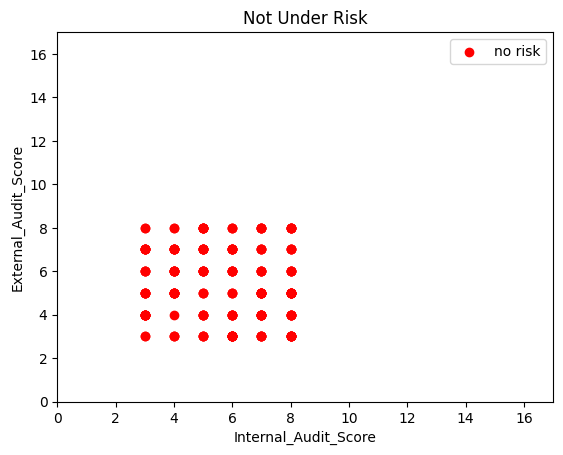

In [4]:
plt.scatter(x[y==0, 0], x[y==0, 1], color='r', label='no risk')
plt.xlim(0,17)
plt.ylim(0,17)
plt.legend()
plt.xlabel('Internal_Audit_Score')
plt.ylabel('External_Audit_Score')
plt.title('Not Under Risk')

Text(0.5, 1.0, 'Under Risk')

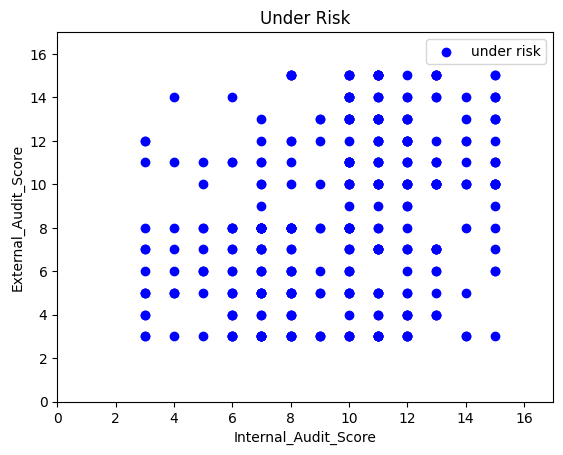

In [5]:
plt.scatter(x[y==1, 0], x[y==1, 1], color='b', label='under risk')
plt.xlim(0,17)
plt.ylim(0,17)
plt.legend()
plt.xlabel('Internal_Audit_Score')
plt.ylabel('External_Audit_Score')
plt.title('Under Risk')

Text(0.5, 1.0, 'Not Under Risk vs Under Risk')

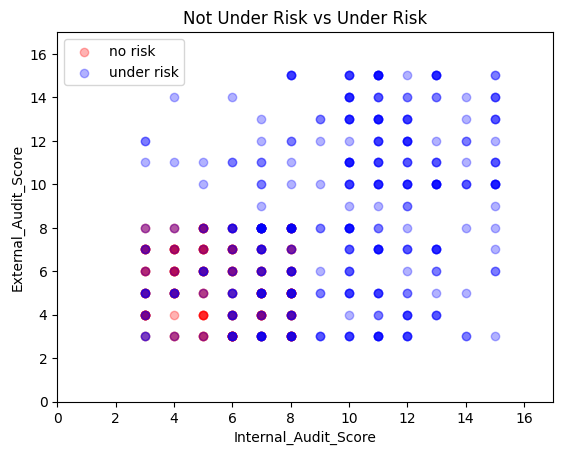

In [6]:
plt.scatter(x[y==0, 0], x[y==0, 1], color='r', alpha=0.3, label='no risk')
plt.scatter(x[y==1, 0], x[y==1, 1], color='b', alpha=0.3, label='under risk')
plt.xlim(0,17)
plt.ylim(0,17)
plt.legend()
plt.xlabel('Internal_Audit_Score')
plt.ylabel('External_Audit_Score')
plt.title('Not Under Risk vs Under Risk')

(1000, 1)
Accuracy for C = 0.1 is: 0.8084714548802947
(1000, 1)
Accuracy for C = 5 is: 0.8066298342541437
(1000, 1)
Accuracy for C = 10 is: 0.8084714548802947


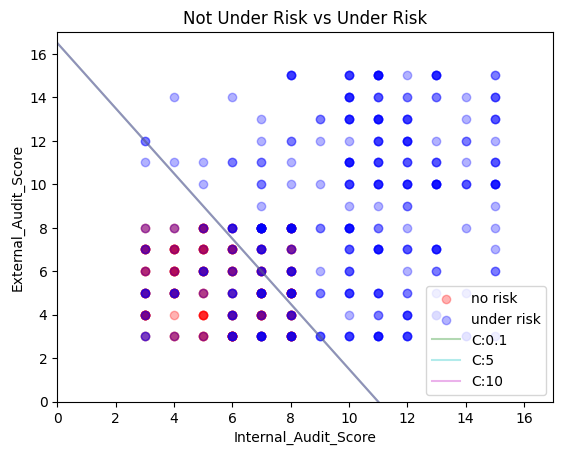

In [ ]:
plt.scatter(x[y==0, 0], x[y==0, 1], color='r', alpha=0.3, label='no risk')
plt.scatter(x[y==1, 0], x[y==1, 1], color='b', alpha=0.3, label='under risk')
plt.xlim(0,17)
plt.ylim(0,17)
plt.legend()
plt.xlabel('Internal_Audit_Score')
plt.ylabel('External_Audit_Score')
plt.title('Not Under Risk vs Under Risk')
x_line = np.linspace(0,17,1000).reshape(-1,1)
c_list = [0.1,5,10]
color_list = ['g','c','m']
for i,c in enumerate(c_list):
    svm_model = svm.SVC(C=c, kernel='linear')
    svm_model.fit(x, y)
    # plot decision boundary
    b = svm_model.intercept_
    w1 = svm_model.coef_[0][0]
    w2 = svm_model.coef_[0][1]
    y_line = -(w1 * x_line + b) / w2
    plt.plot(x_line, y_line, color=color_list[i], label=f'C:{c}', alpha=0.3)
    plt.legend()
    # calculate accuracy
    y_pred = svm_model.predict(x)
    accuracy = (y_pred == y).mean()
    print(f"Accuracy for C = {c} is: {accuracy}")